In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel('hotel_reviews.xlsx')

In [3]:
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0
20487,great location price view hotel great quick pl...,4.0
20488,"ok just looks nice modern outside, desk staff ...",2.0
20489,hotel theft ruined vacation hotel opened sept ...,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


In [5]:
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [6]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [7]:
len(data)

20491

In [8]:
data.shape

(20491, 2)

In [9]:
data.nunique()

Review    20491
Rating        5
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.index

RangeIndex(start=0, stop=20491, step=1)

In [12]:
data["Rating"].value_counts()

5.0    9054
4.0    6039
3.0    2184
2.0    1793
1.0    1421
Name: Rating, dtype: int64

# **Exploratory Data Analysis(EDA)**

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import warnings
warnings.filterwarnings("ignore")

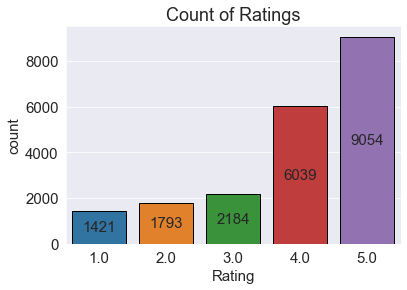

In [270]:
ax = sns.countplot(data=data,x='Rating',edgecolor='black',linewidth=1)

for i in ax.containers:
    ax.bar_label(i,label_type='center')

plt.title('Count of Ratings')
plt.show()

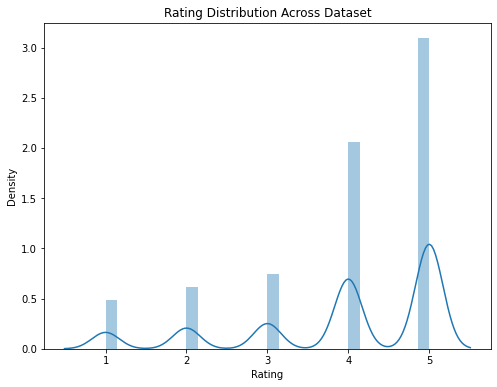

In [16]:
plt.figure(figsize=(8,6))
sns.distplot(data["Rating"])
plt.title("Rating Distribution Across Dataset")
plt.show()

In [273]:
# Custom Function to divide the rating into two class problem
def map_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    else:
        return 'Positive'

In [274]:
# sentiment mapped into 2 class 1=Positive reviews 0=Negtaive reviews
data['Sentiment'] = [map_sentiment(x) for x in data['Rating']]
data.head()

,Review,Rating,Length,cleaned_Review,sentiment_Vader,sentiment_textblob,char_count,word_count,Sentiment,sentiment_fromrating,sentiment_final,Afinn_score,Affin_Sent,polarity,subjectivity,Polarity_sentiment,Polarity_sentiment_Nue
0,nice hotel expensive parking got good deal sta...,4.0,87,nice hotel expensive parking got good deal sta...,Positive,Positive,573,87,Positive,Neutral,Positive,26.0,Positive,0.208744,0.687000,1,Positive
1,ok nothing special charge diamond member hilto...,2.0,250,ok nothing special charge diamond member hilto...,Positive,Positive,1641,250,Negative,Neutral,Positive,37.0,Positive,0.214923,0.495009,1,Positive
2,nice rooms not 4* experience hotel monaco seat...,3.0,217,nice room not 4 experience hotel monaco seattl...,Positive,Positive,1380,217,Positive,Neutral,Positive,18.0,Negative,0.294420,0.605208,1,Positive
3,"unique, great stay, wonderful time hotel monac...",5.0,89,unique great stay wonderful time hotel monaco ...,Positive,Positive,575,89,Positive,Neutral,Positive,38.0,Positive,0.504825,0.691228,1,Positive
4,"great stay great stay, went seahawk game aweso...",5.0,191,great stay great stay went seahawk game awesom...,Positive,Positive,1222,191,Positive,Neutral,Positive,39.0,Positive,0.389286,0.627296,1,Positive


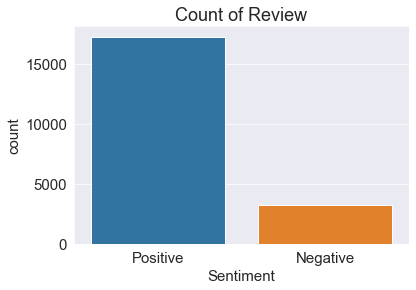

In [276]:
# 1 = Positive; 0 = Negative
sns.countplot(data['Sentiment']).set(title="Count of Review");

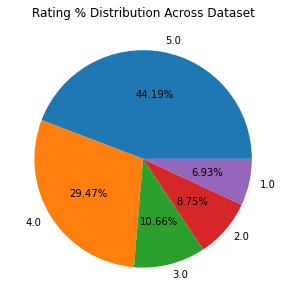

In [17]:
plt.figure(figsize=(13,5))
plt.pie(data['Rating'].value_counts(),labels=['5.0','4.0','3.0','2.0','1.0'],autopct='%1.2f%%')
plt.title("Rating % Distribution Across Dataset")
plt.show()

count    9054.000000
mean       93.963773
std        90.977999
min         7.000000
25%        44.000000
50%        69.000000
75%       111.000000
max      1755.000000
Name: Length, dtype: float64

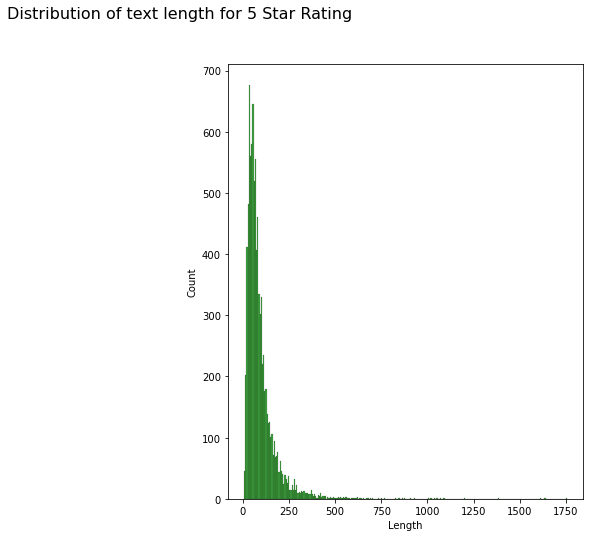

In [18]:
fig = plt.figure(figsize=(14,8))
data["Length"] = data.Review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Rating']==5]['Length'], ax=ax1,color='green')
fig.suptitle('Distribution of text length for 5 Star Rating', fontsize=16)
display(data.Length[data.Rating==5].describe())

count    1421.000000
mean      112.365236
std        99.834855
min        12.000000
25%        51.000000
50%        82.000000
75%       137.000000
max       954.000000
Name: Length, dtype: float64

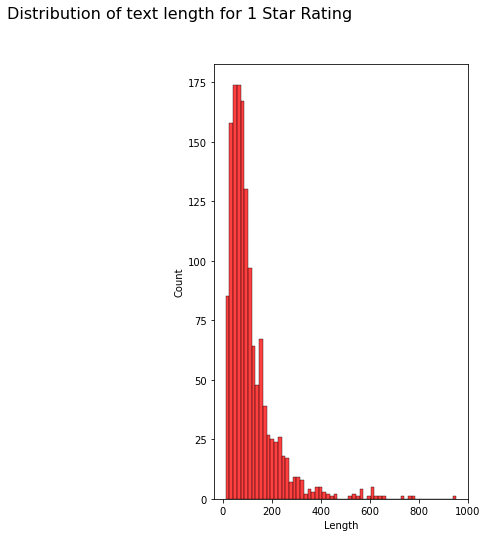

In [19]:
fig2 = plt.figure(figsize=(10,8))
ax2 = fig2.add_subplot(122)
sns.histplot(data[data["Rating"]==1]["Length"],ax=ax2,color='red')
fig2.suptitle("Distribution of text length for 1 Star Rating",fontsize=16)
display(data.Length[data.Rating==1].describe())

# **Text Pre-processing**

In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords=list(STOPWORDS)
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to C:\Users\bhargav's
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\bhargav's
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
#Checking the most used words from reviews & plotting it using WordCloud
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 1000, height = 750, max_words=300,
                          background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(data.values))

    plt.figure(figsize = (6, 5), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title,fontsize=25)
    plt.show()

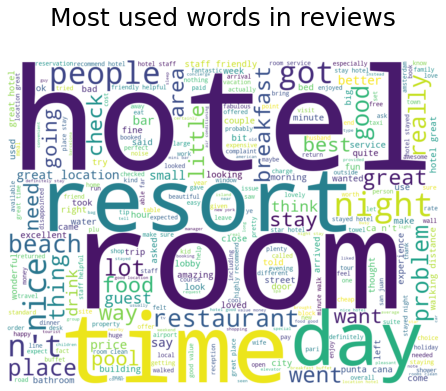

In [22]:
#Plotting the wordcloud on original data for all ratings
wordCloud_generator(data=data['Review'], title="Most used words in reviews\n")

In [23]:
#Checking the most used words from reviews & plotting it using WordCloud
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 1000, height = 750, max_words=300,
                          background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(data.values))

    plt.figure(figsize = (6, 5), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title,fontsize=25)
    plt.show()

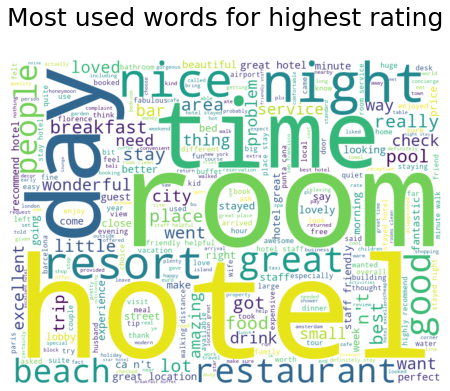

In [24]:
#Plotting the wordcloud on original data for all highest rating (5)
wordCloud_generator(data=data[data['Rating']==5]['Review'], title="Most used words for highest rating\n")

In [25]:
#Checking the most used words from reviews & plotting it using WordCloud
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 1000, height = 750, max_words=300,
                          background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(data.values))

    plt.figure(figsize = (6, 5), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title,fontsize=25)
    plt.show()

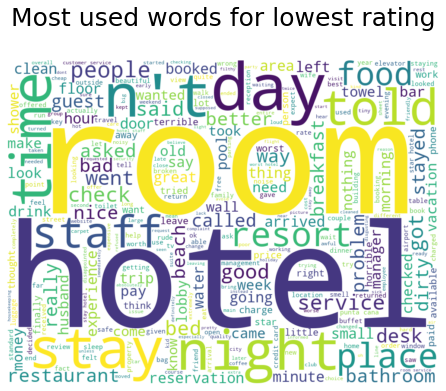

In [26]:
#Plotting t wordcloud on original data for all lowest rating (1)
wordCloud_generator(data=data[data['Rating']==1]['Review'],title="Most used words for lowest rating\n")

# Visualization

# Most Used Words

In [137]:
# Review
mostUsedWords = data['Review'].str.split(expand=True).stack().value_counts()
mostUsedWords_top200 = mostUsedWords[:200]

fig = px.treemap(mostUsedWords_top200, path=[mostUsedWords_top200.index], values=0)
fig.update_layout(title_text='The 200 Most Frequest Words',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

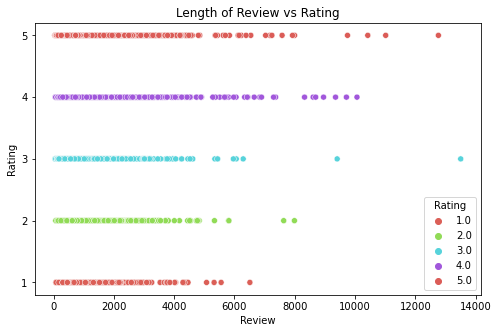

In [27]:
#Checking the length of words in a review for all the rating
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Review'].apply(len), y=data['Rating'], data=data, palette='hls', hue='Rating')
plt.title('Length of Review vs Rating')
plt.yticks([1,2,3,4,5])
plt.show()

# Text data Preprocessing & Cleaning

In [156]:
# Lemmatization
wordnet = WordNetLemmatizer()

# Stop word
stop_words = stopwords.words('english')

In [157]:
# Varibale created for words which are not included in the stopwords
not_stopwords = ("aren", "aren't", "couldn", "couldn't", "didn", "didn't",
                 "doesn", "doesn't", "don", "don't", "hadn", "hadn't", "hasn",
                 "hasn't", "haven", "haven't", "isn", "isn't", "mustn",
                 "mustn't", "no", "not", "only", "shouldn", "shouldn't",
                 "should've", "wasn", "wasn't", "weren", "weren't", "will",
                 "wouldn", "wouldn't", "won't", "very")
stop_words_ = [words for words in stop_words if words not in not_stopwords]

# Additional words added in the stop word list
# stop_words_.append("I")
# stop_words_.append("the")
stop_words_.append("n")
print(stop_words_)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'own', 'same', 'so', 'than', 'too', 's', 't', 'can'

In [158]:
corpus = []
for i in range(0, len(data)):
    
    # Removal of puntuations
    review = re.sub('[^a-zA-Z0-9*]', ' ', data['Review'][i])
    
    # Converting Text to Lower case
    review = review.lower()

    # Spliting each words - eg ['I','was','happy']
    review = review.split()


    # Removal of stop words
    review = [word for word in review if word not in stop_words_]

    # Joining the words in sentences
    review = ' '.join(review)
    corpus.append(review)

In [159]:
# Stop word
stop_words_keywords = stopwords.words('english')

# special additioanl stop words added for keyword extraction
stop_words_keywords.extend(["will", "always", "go", "one", "very", "good", "only", "mr", "lot", "two",
                            "th", "etc", "don", "due", "didn", "since", "nt", "ms", "ok", "almost",
                            "put", "pm", "hyatt", "grand", "till", "add", "let", "hotel", "able",
                            "per", "st", "couldn", "yet", "par", "hi", "well", "would", "I", "the",
                            "s", "also", "great", "get", "like", "take", "thank"
                            ])

# **Adding basic features from reviews**

In [31]:
#adding basic features from reviews
def get_char_count(review):
    return len(review)

def get_word_count(review):
    return len(review.split(' '))

def get_average_word_length(review):
    aux=0
    for word in review.split(' '):
        aux += len(word)
    return aux/len(review.split(' '))

# **N-gram Analaysis**

**Tokenisation**

In [32]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
corpusdata=data['cleaned_Review'].apply(word_tokenize).tolist()
len(corpusdata),data.shape[0]

[nltk_data] Downloading package punkt to C:\Users\bhargav's
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(20491, 20491)

In [33]:
data.Review[0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [160]:
data

,Review,Rating,Length,cleaned_Review,sentiment_Vader,sentiment_textblob,char_count,word_count,Sentiment,sentiment_fromrating,sentiment_final,Afinn_score,Affin_Sent
0,nice hotel expensive parking got good deal sta...,4.0,87,nice hotel expensive parking got good deal sta...,Positive,Positive,573,87,1,Neutral,Positive,26.0,Positive
1,ok nothing special charge diamond member hilto...,2.0,250,ok nothing special charge diamond member hilto...,Positive,Positive,1641,250,0,Neutral,Positive,37.0,Positive
2,nice rooms not 4* experience hotel monaco seat...,3.0,217,nice room not 4 experience hotel monaco seattl...,Positive,Positive,1380,217,1,Neutral,Positive,18.0,Negative
3,"unique, great stay, wonderful time hotel monac...",5.0,89,unique great stay wonderful time hotel monaco ...,Positive,Positive,575,89,1,Neutral,Positive,38.0,Positive
4,"great stay great stay, went seahawk game aweso...",5.0,191,great stay great stay went seahawk game awesom...,Positive,Positive,1222,191,1,Neutral,Positive,39.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,109,best kept secret 3rd time staying charm not 5s...,Positive,Positive,700,109,1,Neutral,Positive,28.0,Positive
20487,great location price view hotel great quick pl...,4.0,39,great location price view hotel great quick pl...,Positive,Positive,296,39,1,Neutral,Positive,19.0,Negative
20488,"ok just looks nice modern outside, desk staff ...",2.0,63,ok just look nice modern outside desk staff nt...,Positive,Neutral,424,63,0,Neutral,Neutral,6.0,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1.0,781,hotel theft ruined vacation hotel opened sept ...,Positive,Neutral,5391,781,0,Neutral,Neutral,-8.0,Negative


# Unigram

In [148]:
# find the most frequent words in the data, extracting information about its content and topics.
stops = set(stopwords.words('english') + ['com'])
co = CountVectorizer(stop_words=stop_words_keywords)
counts = co.fit_transform(corpus)
most_freq_terms = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0, ascending=False).head(25)

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Unigram Frequency'}>

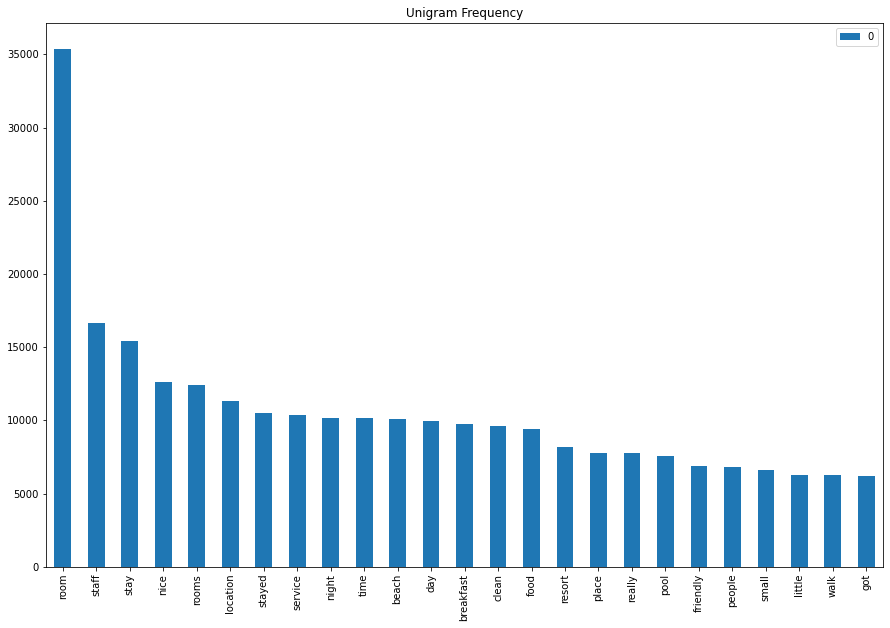

In [149]:
most_freq_terms.plot(kind='bar', title='Unigram Frequency', figsize=(15, 10))

# Bi-Grams

In [151]:
# Now we can check for frequent bi-grams:
co = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words_keywords)
counts1 = co.fit_transform(corpus)
bi_grams = pd.DataFrame(counts1.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0, ascending=False).head(25)

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'bi-grams'}>

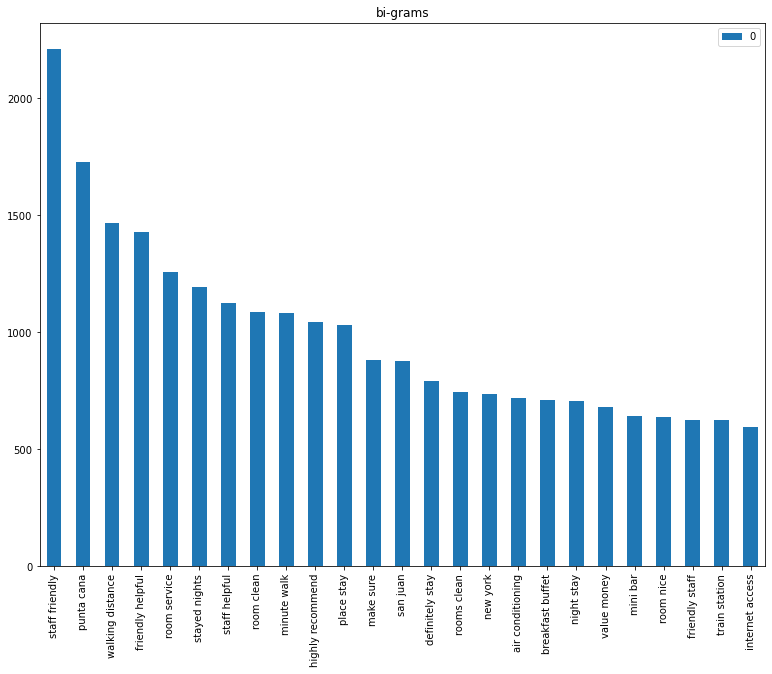

In [152]:
bi_grams.plot(kind='bar', title='bi-grams', figsize=(13, 10))

# Tri_Grams

In [153]:
# Now we can check for frequent tri-grams:
co = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words_keywords)
counts1 = co.fit_transform(corpus)
tri_grams = pd.DataFrame(counts1.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0, ascending=False).head(25)

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'tri-grams'}>

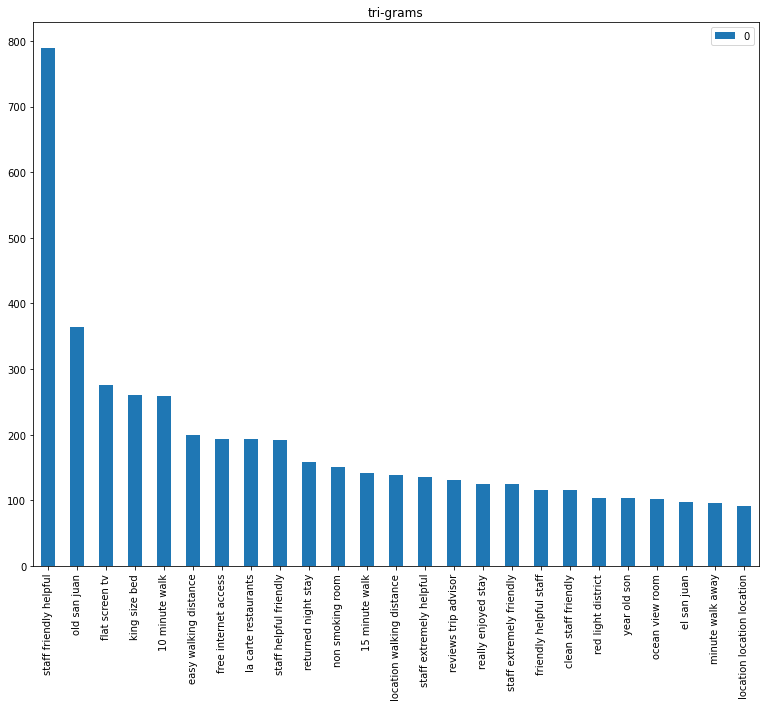

In [154]:
tri_grams.plot(kind='bar', title='tri-grams', figsize=(13, 10))

# Term Frequency with TFIDF

# Uni Gram

In [161]:
# Converting text into vectors by TFIDF
tfidf2 = TfidfVectorizer(norm="l2",analyzer='word', stop_words=stop_words_keywords,ngram_range=(1,1))
tfidf2_x = tfidf2.fit_transform(corpus)
most_freq_terms = pd.DataFrame(tfidf2_x.sum(axis=0),columns=tfidf2.get_feature_names_out()).T.sort_values(0, ascending=False).head(25)


<AxesSubplot:title={'center':'most frequent terms & their frequency'}>

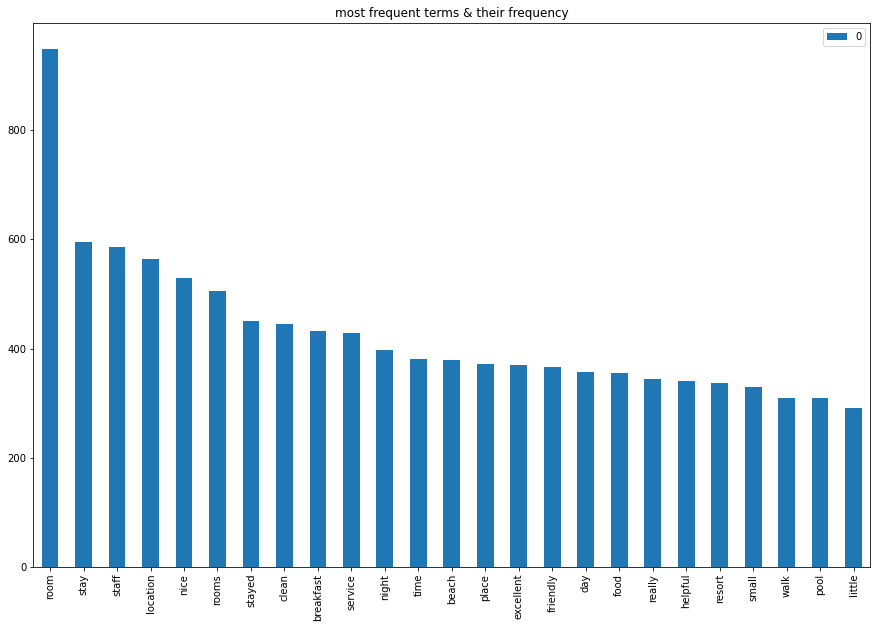

In [162]:
most_freq_terms.plot(kind='bar',title='most frequent terms & their frequency',figsize=(15, 10))

# Bi_Grams

In [163]:
# Now we can check for frequent bi-grams:

tfidf2 = TfidfVectorizer(norm="l2",analyzer='word',stop_words=stop_words_keywords,ngram_range=(2, 2))
tfidf2_x = tfidf2.fit_transform(corpus)
most_freq_terms = pd.DataFrame(tfidf2_x.sum(axis=0),columns=tfidf2.get_feature_names_out()).T.sort_values(0,ascending=False).head(25)

<AxesSubplot:title={'center':'Bi-Gram'}>

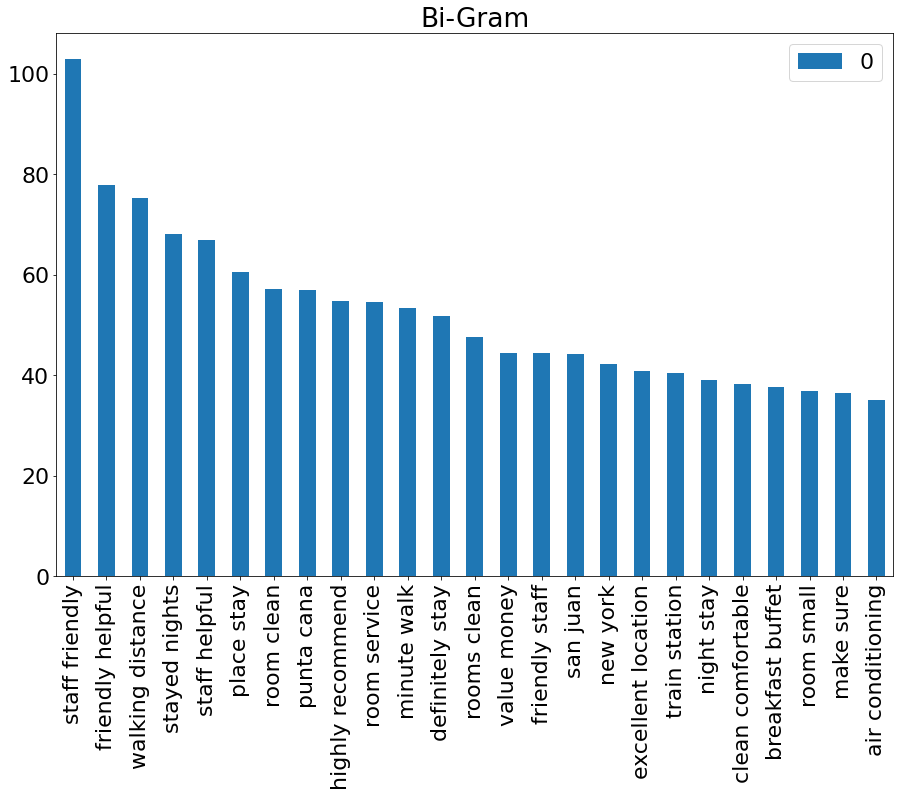

In [164]:
plt.rcParams.update({'font.size': 22})
most_freq_terms.plot(kind='bar', title='Bi-Gram', figsize=(15, 10))

# Tri_Grams

In [165]:
# Now we can check for frequent tri-grams:

tfidf2 = TfidfVectorizer(norm="l2",analyzer='word',stop_words=stop_words_keywords,ngram_range=(3, 3))
tfidf2_x = tfidf2.fit_transform(corpus)
most_freq_terms = pd.DataFrame(tfidf2_x.sum(axis=0),columns=tfidf2.get_feature_names_out()).T.sort_values(0,ascending=False).head(25)

<AxesSubplot:title={'center':'Tri-Gram'}>

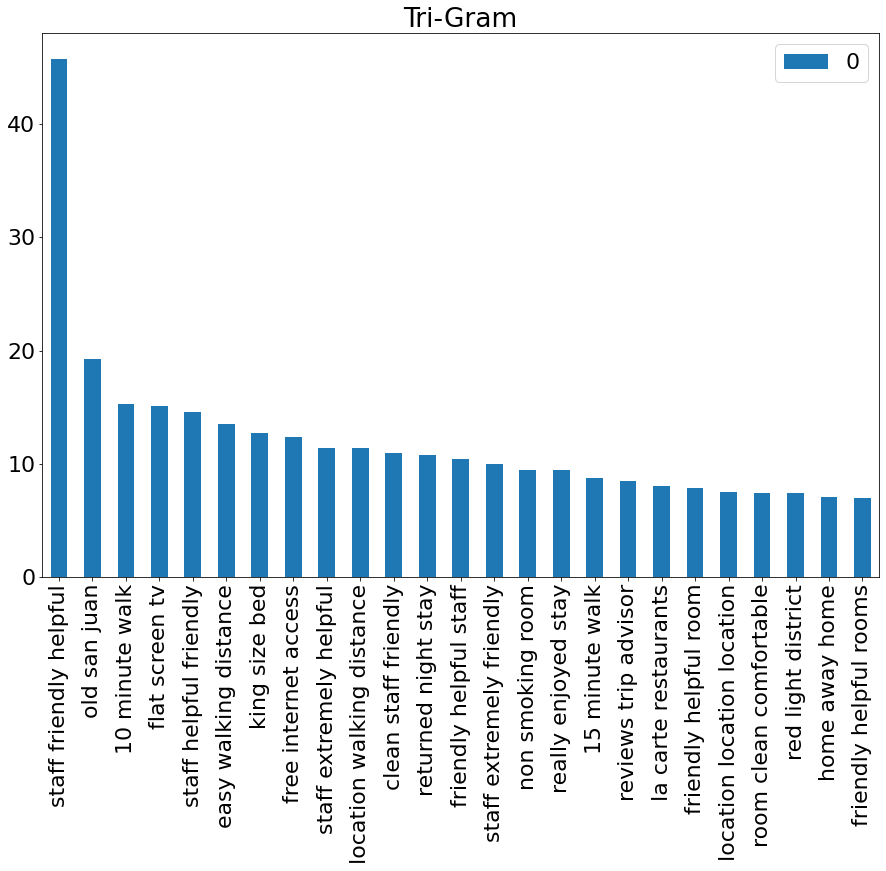

In [166]:
plt.rcParams.update({'font.size': 22})
most_freq_terms.plot(kind='bar', title='Tri-Gram', figsize=(15, 10))

# **Sentimental Analysis**

In [44]:
nltk.download('vader_lexicon')
sentiment_object=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\bhargav's
[nltk_data]     laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [45]:
#lets add sentiment using vader sentiment

def get_sentiment_vader(review):
    sentiment_dict= sentiment_object.polarity_scores(review)
    if sentiment_dict['compound'] >=0.05 :
        return ('Positive')
    elif sentiment_dict['compound'] <=0.05 :
        return ('Negative')
    else:
        return('Neutral')

In [46]:
data['sentiment_Vader'] = data.cleaned_Review.apply(lambda x: get_sentiment_vader(x))

In [47]:
data

,Review,Rating,Length,cleaned_Review,sentiment_Vader
0,nice hotel expensive parking got good deal sta...,4.0,87,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,2.0,250,ok nothing special charge diamond member hilto...,Positive
2,nice rooms not 4* experience hotel monaco seat...,3.0,217,nice room not 4 experience hotel monaco seattl...,Positive
3,"unique, great stay, wonderful time hotel monac...",5.0,89,unique great stay wonderful time hotel monaco ...,Positive
4,"great stay great stay, went seahawk game aweso...",5.0,191,great stay great stay went seahawk game awesom...,Positive
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,109,best kept secret 3rd time staying charm not 5s...,Positive
20487,great location price view hotel great quick pl...,4.0,39,great location price view hotel great quick pl...,Positive
20488,"ok just looks nice modern outside, desk staff ...",2.0,63,ok just look nice modern outside desk staff nt...,Positive
20489,hotel theft ruined vacation hotel opened sept ...,1.0,781,hotel theft ruined vacation hotel opened sept ...,Positive


In [48]:
#Drawn a positive sample for testing the sentiment
data['cleaned_Review'][20487]

'great location price view hotel great quick place sightsdirectly street space needle downtown tram science center downtown mallamenities nice indoor pool kid secure underground parking garage great restaurantrooms great size couple familiesrecommend hotel visiting like tostay downtown near sight'

# **Visualizing the Vader Sentiment Analysis**

Total Count of Sentiments

Positive    92.177053
Negative     7.822947
Name: sentiment_Vader, dtype: float64 



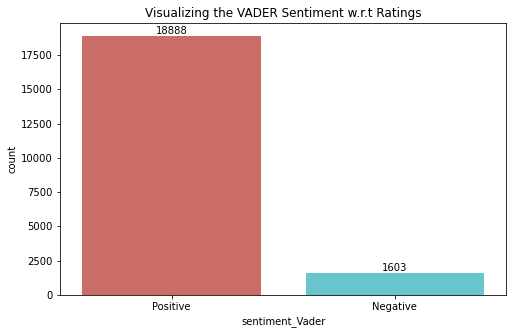

In [49]:

plt.figure(figsize=(8,5))

plt.title("Visualizing the VADER Sentiment w.r.t Ratings")

ax = sns.countplot(data = data , x = 'sentiment_Vader',palette='hls')

for i in ax.containers:
    ax.bar_label(i,)

print('Total Count of Sentiments\n')

print(data['sentiment_Vader'].value_counts(['sentiment_Vader'])*100, '\n')

# **Polarity Sentiments Analysis**

In [186]:
from wordcloud import WordCloud
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 15})
import plotly.express as px


In [169]:
polarity = []
subjectivity = []
for i in data['cleaned_Review']:
    p = TextBlob(i).sentiment.polarity
    s = TextBlob(i).sentiment.subjectivity
    polarity.append(p)
    subjectivity.append(s)

In [171]:
data['polarity'] = polarity
data['subjectivity'] = subjectivity

In [173]:
Polarity_sentiment = [1 if polarity > 0 else 0 for polarity in data['polarity']]
# Polarity_sentiment = ['Positive' if polarity > 0 else 'Negative' for polarity in data['polarity']]
Polarity_sentiment_Nue = ['Positive' if polarity > 0 else 'Nuetral' if polarity ==0 else 'Negative' for polarity in data['polarity']]

In [179]:
data['Polarity_sentiment'] = Polarity_sentiment
data['Polarity_sentiment_Nue'] = Polarity_sentiment_Nue

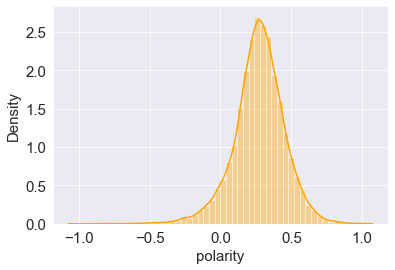

In [187]:
# Polarity score visualization
sns.distplot(data['polarity'], color='orange');

In [181]:
from collections import Counter

Class: 1, Number: 19124, Percentage 93.33
Class: 0, Number: 1367, Percentage 6.67


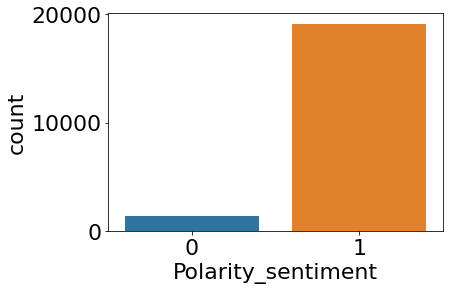

In [183]:
sns.countplot(data['Polarity_sentiment'])
counter = Counter(data['Polarity_sentiment'])
counter.items()

# Percentage of Data as per polarity Sentiment, Huge diffrence in the two classes..!!
for k, v in counter.items():
    per = v / data.shape[0] * 100
    print("Class: {}, Number: {}, Percentage {}".format(k, v, np.round(per, 2)))

Class: Positive, Number: 19124, Percentage 93.33
Class: Negative, Number: 1343, Percentage 6.55
Class: Nuetral, Number: 24, Percentage 0.12


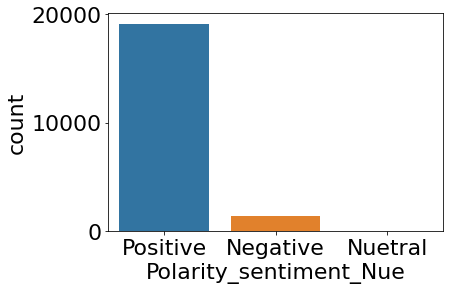

In [185]:
sns.countplot(data['Polarity_sentiment_Nue'])
counter = Counter(data['Polarity_sentiment_Nue'])
counter.items()

# Percentage of Data as per polarity Sentiment, Huge diffrence in the two classes..!!
for k, v in counter.items():
    per = v / data.shape[0] * 100
    print("Class: {}, Number: {}, Percentage {}".format(k, v, np.round(per, 2)))

In [50]:
#let add sentiment using Textblob sentimet
def get_sentiment_textblob(review):
    sentimet_score=TextBlob(review).sentiment.polarity

    if sentimet_score<0:
        return 'Negative'
    elif sentimet_score>=0 and sentimet_score<=0.2:
        return 'Neutral'
    else:
        return 'Positive'

In [51]:
data['sentiment_textblob'] = data.cleaned_Review.apply(lambda x:get_sentiment_textblob(x))

In [52]:
#lets add sentiment for rating
def get_sentiment_rating(rating):
    if rating in [4,5]:
        return 'Positive'
    elif rating in [1,2]:
        return 'Negative'

    else:
        return 'Neutral'

In [53]:
data['char_count']=data['cleaned_Review'].apply(get_char_count)
data['word_count']=data['cleaned_Review'].apply(get_word_count)

In [54]:
def sentiment(review):
    if review>=3:
        return 1
    else:
        return 0
data['Sentiment']= data['Rating'].apply(sentiment)

In [55]:
#lets add sentiment for rating
def get_sentiment_rating(rating):
    if rating in [4,5]:
        return 'Positive'
    elif rating in [1,2]:
        return 'Negative'

    else:
        return 'Neutral'

In [56]:
data['sentiment_fromrating']= data['cleaned_Review'].apply(get_sentiment_rating)

In [57]:
data

,Review,Rating,Length,cleaned_Review,sentiment_Vader,sentiment_textblob,char_count,word_count,Sentiment,sentiment_fromrating
0,nice hotel expensive parking got good deal sta...,4.0,87,nice hotel expensive parking got good deal sta...,Positive,Positive,573,87,1,Neutral
1,ok nothing special charge diamond member hilto...,2.0,250,ok nothing special charge diamond member hilto...,Positive,Positive,1641,250,0,Neutral
2,nice rooms not 4* experience hotel monaco seat...,3.0,217,nice room not 4 experience hotel monaco seattl...,Positive,Positive,1380,217,1,Neutral
3,"unique, great stay, wonderful time hotel monac...",5.0,89,unique great stay wonderful time hotel monaco ...,Positive,Positive,575,89,1,Neutral
4,"great stay great stay, went seahawk game aweso...",5.0,191,great stay great stay went seahawk game awesom...,Positive,Positive,1222,191,1,Neutral
...,...,...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,109,best kept secret 3rd time staying charm not 5s...,Positive,Positive,700,109,1,Neutral
20487,great location price view hotel great quick pl...,4.0,39,great location price view hotel great quick pl...,Positive,Positive,296,39,1,Neutral
20488,"ok just looks nice modern outside, desk staff ...",2.0,63,ok just look nice modern outside desk staff nt...,Positive,Neutral,424,63,0,Neutral
20489,hotel theft ruined vacation hotel opened sept ...,1.0,781,hotel theft ruined vacation hotel opened sept ...,Positive,Neutral,5391,781,0,Neutral


In [58]:
data['sentiment_final']=data[['sentiment_Vader', 'sentiment_textblob','sentiment_fromrating']].mode(axis=1)[0]
data['sentiment_final']

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
20486    Positive
20487    Positive
20488     Neutral
20489     Neutral
20490     Neutral
Name: sentiment_final, Length: 20491, dtype: object

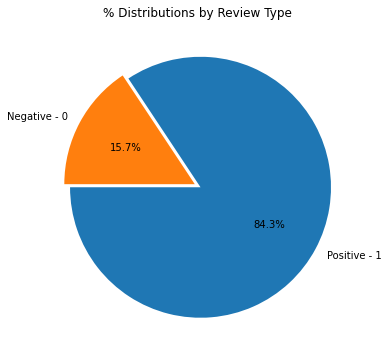

In [59]:
plt.figure(figsize=(12,6))

b= plt.pie(round(data['Sentiment'].value_counts(normalize=True)*100,2),explode=(0.025,0.025),
            labels=['Positive - 1', 'Negative - 0'], autopct="%1.1f%%", startangle=180)

plt.title("% Distributions by Review Type")

plt.show()

In [60]:
data['Sentiment'].value_counts()

1    17277
0     3214
Name: Sentiment, dtype: int64

# Using Bag of Words Vectorization-based Models

In [61]:
import nltk

# create the vocabulary
vocab = set()

# create the bag-of-words model
bow_model = []

for text in data:
    # create a dictionary to store the word counts
    word_counts = {}

    # tokenize the text
    tokens = nltk.word_tokenize(text)

    # update the vocabulary
    vocab.update(tokens)

    # count the occurrences of each word
    for word in tokens:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    # add the word counts to the bag-of-words model
    bow_model.append(word_counts)

In [62]:
# print the vocabulary
print(vocab)

# print the word counts for the first text document
print(bow_model[0])

{'Sentiment', 'Rating', 'sentiment_Vader', 'sentiment_final', 'Review', 'Length', 'word_count', 'sentiment_fromrating', 'char_count', 'cleaned_Review', 'sentiment_textblob'}
{'Review': 1}


# **Afinn Sentiment Analysis**

In [63]:
!pip install afinn

In [64]:
# Emotion Lexicon - Affin
from afinn import Afinn

In [65]:
#Object Instantiation
afn = Afinn()

In [66]:
neg = data['cleaned_Review'][20490]

In [67]:
afn.score(neg)

14.0

In [68]:
pos = data['cleaned_Review'][20487]

In [69]:
afn.score(pos)

19.0

In [70]:
data['Afinn_score'] = data['cleaned_Review'].apply(lambda x: afn.score(x))

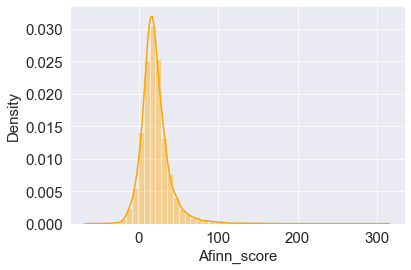

In [188]:
# Affin score visualization
sns.distplot(data['Afinn_score'], color='orange');

In [71]:
data[['cleaned_Review',  'Rating', 'Afinn_score']]

,cleaned_Review,Rating,Afinn_score
0,nice hotel expensive parking got good deal sta...,4.0,26.0
1,ok nothing special charge diamond member hilto...,2.0,37.0
2,nice room not 4 experience hotel monaco seattl...,3.0,18.0
3,unique great stay wonderful time hotel monaco ...,5.0,38.0
4,great stay great stay went seahawk game awesom...,5.0,39.0
...,...,...,...
20486,best kept secret 3rd time staying charm not 5s...,5.0,28.0
20487,great location price view hotel great quick pl...,4.0,19.0
20488,ok just look nice modern outside desk staff nt...,2.0,6.0
20489,hotel theft ruined vacation hotel opened sept ...,1.0,-8.0


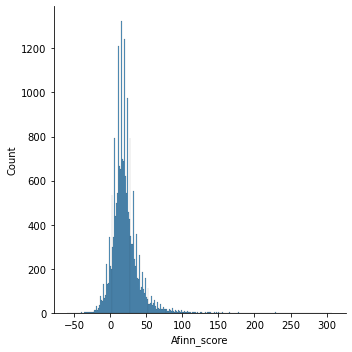

In [72]:
sns.displot(data['Afinn_score'])
plt.show()

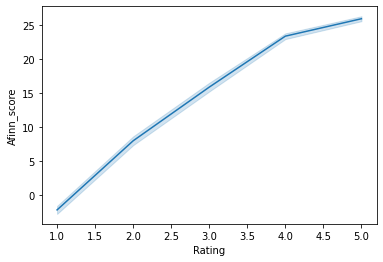

In [73]:
sns.lineplot(y='Afinn_score',x='Rating',data=data)
plt.show()

In [74]:
#Defining a function for Sentiment Analysis
def condition(x):
    if x>=20:
        return "Positive"
    else:
        return 'Negative'

In [75]:
#Applying condition on Afinn score
data['Affin_Sent'] = data['Afinn_score'].apply(condition)

In [76]:
#Reviewing the data
data[['cleaned_Review',  'Rating', 'Afinn_score', 'Affin_Sent']]

,cleaned_Review,Rating,Afinn_score,Affin_Sent
0,nice hotel expensive parking got good deal sta...,4.0,26.0,Positive
1,ok nothing special charge diamond member hilto...,2.0,37.0,Positive
2,nice room not 4 experience hotel monaco seattl...,3.0,18.0,Negative
3,unique great stay wonderful time hotel monaco ...,5.0,38.0,Positive
4,great stay great stay went seahawk game awesom...,5.0,39.0,Positive
...,...,...,...,...
20486,best kept secret 3rd time staying charm not 5s...,5.0,28.0,Positive
20487,great location price view hotel great quick pl...,4.0,19.0,Negative
20488,ok just look nice modern outside desk staff nt...,2.0,6.0,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1.0,-8.0,Negative


In [77]:
data['Affin_Sent'].value_counts()

Negative    11217
Positive     9274
Name: Affin_Sent, dtype: int64

In [78]:
data1=data[['cleaned_Review','sentiment_final']].copy()

In [79]:
data1

,cleaned_Review,sentiment_final
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Positive
2,nice room not 4 experience hotel monaco seattl...,Positive
3,unique great stay wonderful time hotel monaco ...,Positive
4,great stay great stay went seahawk game awesom...,Positive
...,...,...
20486,best kept secret 3rd time staying charm not 5s...,Positive
20487,great location price view hotel great quick pl...,Positive
20488,ok just look nice modern outside desk staff nt...,Neutral
20489,hotel theft ruined vacation hotel opened sept ...,Neutral


# **Model Validation**

# **Splitting Data into Training and Testing Set**

In [209]:
x=data1['cleaned_Review']
y=data1['sentiment_final']

In [210]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)

In [211]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.20, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16392, 77288)
(16392,)
(4099, 77288)
(4099,)


# **Model Building**

## **Logistic Regression**

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV,KFold

In [215]:
from sklearn.linear_model import LogisticRegression
# Traning the model
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

LogisticRegression()

In [216]:
# Testing the model
y_predLR=LR_model.predict(x_test)
y_predLR

array([0, 2, 2, ..., 1, 2, 2])

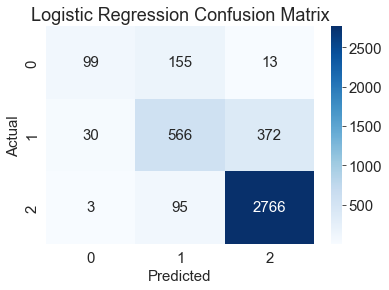

In [217]:
# Confusion matrix
cm = confusion_matrix(y_test, y_predLR)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [218]:
#Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
LR=confusion_matrix(y_test,y_predLR)
print(LR)
accuracy_score(y_test,y_predLR)

[[  99  155   13]
 [  30  566  372]
 [   3   95 2766]]


0.8370334227860454

In [219]:
print(classification_report(y_test,LR_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.37      0.50       267
           1       0.69      0.58      0.63       968
           2       0.88      0.97      0.92      2864

    accuracy                           0.84      4099
   macro avg       0.77      0.64      0.68      4099
weighted avg       0.83      0.84      0.82      4099



# **Decision Tree**

In [220]:
from sklearn.tree import DecisionTreeRegressor
DT_model=DecisionTreeRegressor()
DT_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [221]:
# Testing the model
y_predDT=DT_model.predict(x_test)
y_predDT

array([0., 1., 2., ..., 0., 2., 1.])

In [222]:
#Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
DT=confusion_matrix(y_test,y_predDT)
print(DT)
accuracy_score(y_test,y_predDT)

[[ 115  108   44]
 [ 110  417  441]
 [  41  429 2394]]


0.7138326421078312

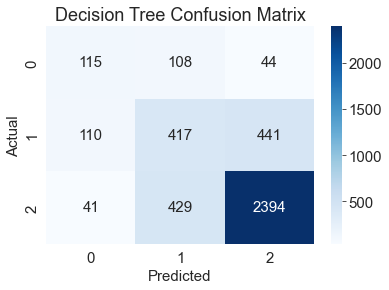

In [223]:
# Confusion matrix
cm = confusion_matrix(y_test, y_predDT)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [224]:
print(classification_report(y_test,DT_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43       267
           1       0.44      0.43      0.43       968
           2       0.83      0.84      0.83      2864

    accuracy                           0.71      4099
   macro avg       0.57      0.57      0.57      4099
weighted avg       0.71      0.71      0.71      4099



# **Random Forest**

In [225]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier()
RF_model.fit(x_train,y_train)

RandomForestClassifier()

In [226]:
# Testing the model
y_predRF=RF_model.predict(x_test)
y_predRF

array([2, 2, 2, ..., 2, 2, 2])

In [227]:
#Confusion Matrix and Accuracy
RF=confusion_matrix(y_test,y_predRF)
print(RF)
accuracy_score(y_test,y_predRF)

[[  17   60  190]
 [   0  103  865]
 [   0   10 2854]]


0.72554281532081

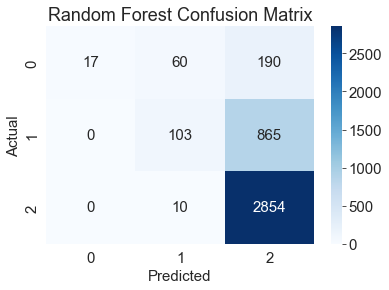

In [228]:
# Confusion matrix
cm = confusion_matrix(y_test, y_predRF)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [229]:
print(classification_report(y_test,RF_model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12       267
           1       0.60      0.11      0.18       968
           2       0.73      1.00      0.84      2864

    accuracy                           0.73      4099
   macro avg       0.78      0.39      0.38      4099
weighted avg       0.72      0.73      0.64      4099



# **Ada Boost**

In [230]:
from sklearn.ensemble import AdaBoostClassifier
ada_model=AdaBoostClassifier()
ada_model.fit(x_train,y_train)

AdaBoostClassifier()

In [231]:
# Testing the model
y_predada=ada_model.predict(x_test)
y_predada

array([0, 2, 2, ..., 1, 2, 2])

In [232]:
#Confusion Matrix and Accuracy
ada=confusion_matrix(y_test,y_predRF)
print(ada)
accuracy_score(y_test,y_predada)

[[  17   60  190]
 [   0  103  865]
 [   0   10 2854]]


0.7987313979019273

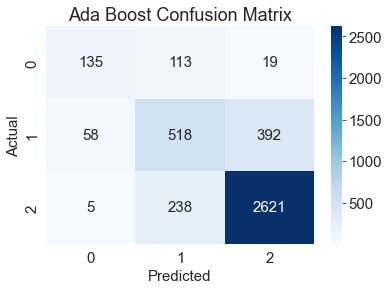

In [233]:
# Confusion matrix
cm = confusion_matrix(y_test, y_predada)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ada Boost Confusion Matrix')
plt.show()

In [234]:
print(classification_report(y_test,ada_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.68      0.51      0.58       267
           1       0.60      0.54      0.56       968
           2       0.86      0.92      0.89      2864

    accuracy                           0.80      4099
   macro avg       0.71      0.65      0.68      4099
weighted avg       0.79      0.80      0.79      4099



# **XGBoost**

In [235]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [236]:
# Testing the model
y_predxgb=xgb_model.predict(x_test)
y_predxgb

array([0, 1, 2, ..., 1, 2, 2], dtype=int64)

In [237]:
#Confusion Matrix and Accuracy
xgb=confusion_matrix(y_test,y_predxgb)
print(xgb)
accuracy_score(y_test,y_predxgb)

[[ 143  109   15]
 [  51  556  361]
 [   5  139 2720]]


0.8341058794828007

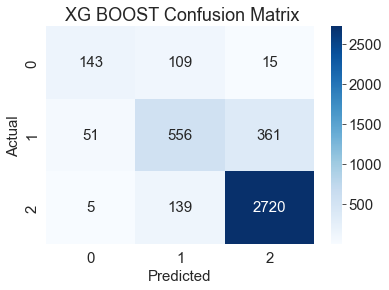

In [238]:
# Confusion matrix
cm = confusion_matrix(y_test, y_predxgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(' XG BOOST Confusion Matrix')
plt.show()

In [239]:
print(classification_report(y_test,xgb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.72      0.54      0.61       267
           1       0.69      0.57      0.63       968
           2       0.88      0.95      0.91      2864

    accuracy                           0.83      4099
   macro avg       0.76      0.69      0.72      4099
weighted avg       0.82      0.83      0.83      4099



# **LightGBM**

In [240]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [241]:
from lightgbm import LGBMClassifier
lgb_model = LGBMClassifier()
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.241939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 275718
[LightGBM] [Info] Number of data points in the train set: 16392, number of used features: 5191
[LightGBM] [Info] Start training from score -2.652693
[LightGBM] [Info] Start training from score -1.440701
[LightGBM] [Info] Start training from score -0.367047


LGBMClassifier()

In [242]:
# Testing the model
y_predlgb=lgb_model.predict(x_test)
y_predlgb

array([0, 1, 2, ..., 1, 2, 2])

In [243]:
#Confusion Matrix and Accuracy
lgb=confusion_matrix(y_test,y_predlgb)
print(lgb)
accuracy_score(y_test,y_predlgb)

[[ 150  103   14]
 [  58  578  332]
 [   6  111 2747]]


0.8477677482312759

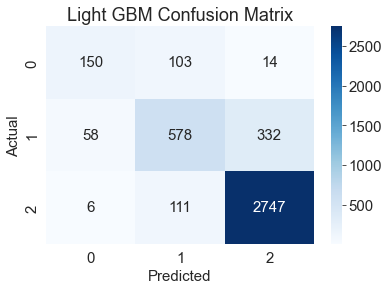

In [244]:
# Confusion matrix
cm = confusion_matrix(y_test, y_predlgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Light GBM Confusion Matrix')
plt.show()

In [245]:
print(classification_report(y_test,lgb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.70      0.56      0.62       267
           1       0.73      0.60      0.66       968
           2       0.89      0.96      0.92      2864

    accuracy                           0.85      4099
   macro avg       0.77      0.71      0.73      4099
weighted avg       0.84      0.85      0.84      4099



# **Naive Bayes Classifier**

In [246]:
from sklearn.naive_bayes import MultinomialNB
NB_model=MultinomialNB()
NB_model.fit(x_train,y_train)

MultinomialNB()

In [247]:
# Testing the model
y_predNB=lgb_model.predict(x_test)
y_predNB

array([0, 1, 2, ..., 1, 2, 2])

In [248]:
#Confusion Matrix and Accuracy
NB=confusion_matrix(y_test,y_predNB)
print(NB)
accuracy_score(y_test,y_predNB)

[[ 150  103   14]
 [  58  578  332]
 [   6  111 2747]]


0.8477677482312759

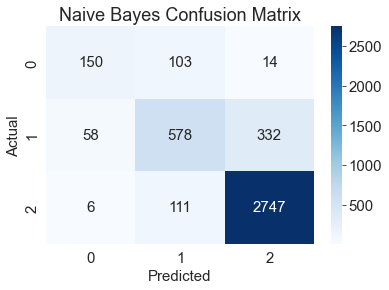

In [249]:
# Confusion matrix
cm = confusion_matrix(y_test, y_predNB)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [250]:
print(classification_report(y_test,NB_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       267
           1       0.00      0.00      0.00       968
           2       0.70      1.00      0.82      2864

    accuracy                           0.70      4099
   macro avg       0.23      0.33      0.27      4099
weighted avg       0.49      0.70      0.57      4099



# **K-Nearest Neighbors**

In [251]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [252]:
# Testing the model
y_predKNN=KNN_model.predict(x_test)
y_predKNN

array([0, 2, 2, ..., 1, 2, 2])

In [253]:
#Confusion Matrix and Accuracy
KNN=confusion_matrix(y_test,y_predKNN)
print(KNN)
accuracy_score(y_test,y_predKNN)

[[  70   78  119]
 [  65  285  618]
 [  25  221 2618]]


0.7252988533788729

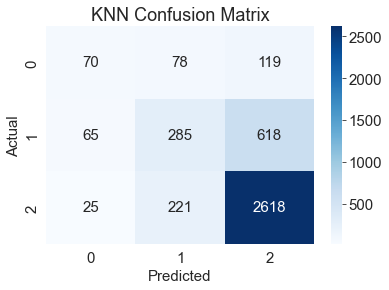

In [254]:
# Confusion matrix
cm = confusion_matrix(y_test, y_predKNN)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

In [255]:
print(classification_report(y_test,KNN_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.44      0.26      0.33       267
           1       0.49      0.29      0.37       968
           2       0.78      0.91      0.84      2864

    accuracy                           0.73      4099
   macro avg       0.57      0.49      0.51      4099
weighted avg       0.69      0.73      0.70      4099



# **Support Vector Machines(SVM)**

In [256]:
from sklearn.svm import SVC
SVM_model=SVC()
SVM_model.fit(x_train,y_train)

SVC()

In [257]:
# Testing the model
y_predSVM=SVM_model.predict(x_test)
y_predSVM

array([0, 1, 2, ..., 1, 2, 2])

In [258]:
#Confusion Matrix and Accuracy
SVM=confusion_matrix(y_test,y_predSVM)
print(SVM)
accuracy_score(y_test,y_predSVM)

[[  87  170   10]
 [  11  593  364]
 [   3  103 2758]]


0.8387411563796048

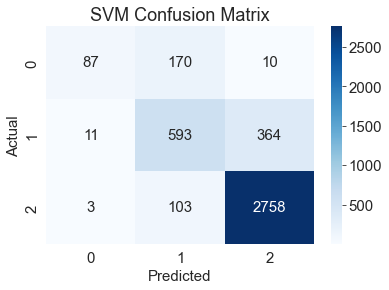

In [259]:
# Confusion matrix
cm = confusion_matrix(y_test, y_predSVM)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

In [260]:
print(classification_report(y_test,SVM_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.33      0.47       267
           1       0.68      0.61      0.65       968
           2       0.88      0.96      0.92      2864

    accuracy                           0.84      4099
   macro avg       0.81      0.63      0.68      4099
weighted avg       0.83      0.84      0.83      4099



# **ML Pipielines(SVM is better model)**

In [261]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [262]:
# create feature union
features=[]
features.append(('pca',PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_Union=FeatureUnion(features)

In [263]:
# create pipeline
estimators = []
estimators.append(('features_Union', feature_Union))
estimators.append(('SVM', SVC(max_iter=300)))
model = Pipeline(estimators)

In [264]:
# Evaluate pipiline
accuracy_score(y_test,y_predSVM)

0.8387411563796048

In [265]:
# save model using pickle and load and predict
from pickle import dump
from pickle import load
import pickle

# **Saving the trained model**

In [266]:
filename='trained_model.sav'
pickle.dump(SVM_model,open(filename,'wb'))

In [267]:
# loading the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [268]:
result=loaded_model.score(x_test,y_test)
print(result)

0.8387411563796048
